## Import Libraries and Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


In [2]:
#Load the data
df = pd.read_csv('heart.csv')

## Explore the features of the dataset

In [3]:
df.shape

(303, 14)

In [4]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#Change column names to be easier to understand.
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [6]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#How many cases are male (1) and female (0)?
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [8]:
#How many heart disease cases do we have in this set?
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
#df.corr()

In [10]:
#x = ['men', 'women']
#y = [207, 96]
#plt.bar(x,y)
#plt.show()

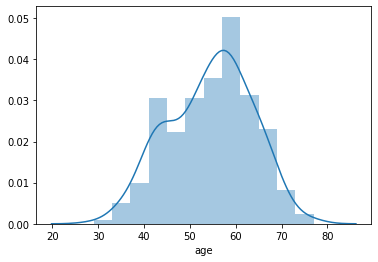

In [11]:
sns.distplot(df['age'])

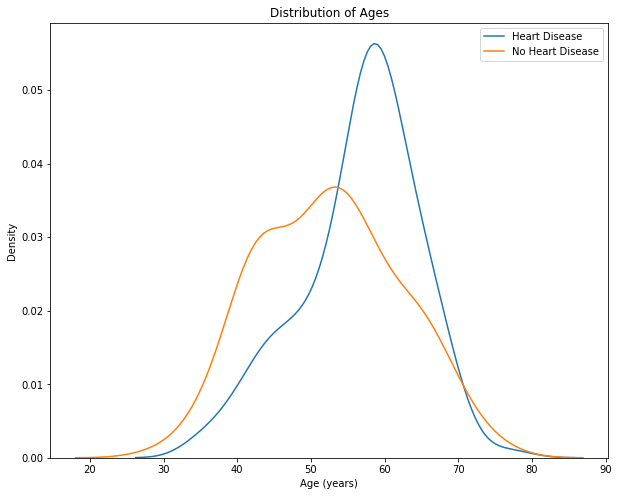

In [12]:
plt.figure(figsize = (10, 8))
sns.kdeplot(df.loc[df['target'] == 0, 'age'], label = 'Heart Disease')
sns.kdeplot(df.loc[df['target'] == 1, 'age'], label = 'No Heart Disease')

# Labeling of plot
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')

plt.show()

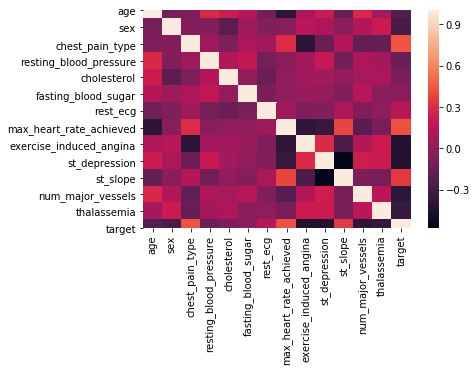

In [13]:
correlations = df.corr()
sns.heatmap(correlations)

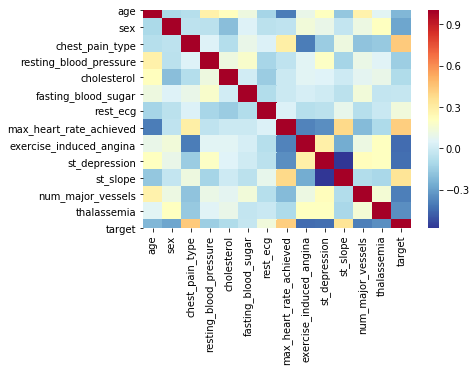

In [14]:
sns.heatmap(correlations,cmap=plt.cm.RdYlBu_r)

In [15]:
#sns.pairplot(df[['age', 'sex', 'chol', 'cp']])
#plt.show()

## Check for missing values 

In [16]:
#Check for missing values
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

Since we have no missing values in this dataset, we will not need to use imputation or estimation to replace missing values.

## Identify and drop duplicate rows

In [17]:
#Check for duplicate values
df.duplicated().any()

True

In [18]:
#Identify duplicate values
duplicateRowsDF = df[df.duplicated()]
print(duplicateRowsDF)

#There is one pair of duplicate rows in the dataset.

     age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
164   38    1                2                     138          175   

     fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
164                    0         1                      173   

     exercise_induced_angina  st_depression  st_slope  num_major_vessels  \
164                        0            0.0         2                  4   

     thalassemia  target  
164            2       1  


In [19]:
#Old Shape
df.shape

(303, 14)

In [20]:
#Drop one of the duplicates
df.drop_duplicates(keep='first',inplace=True) 

In [21]:
#New shape
df.shape

(302, 14)

## Check for outliers

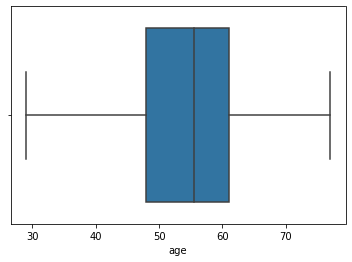

In [22]:
#Distribution of age
sns.boxplot(df['age'])
plt.show()

There do not appear to be any outliers in the age distribution.

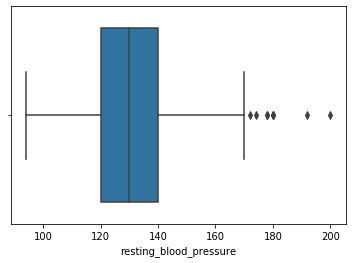

In [23]:
#Distribution of resting blood pressure
sns.boxplot(df['resting_blood_pressure'])
plt.show()

Resting blood pressure has several datapoints above the maximum on the boxplot (Q3 + 1.5IQR), but it's unclear how big of an impact they will have on a potential prediction model. Since there are several of them and they are all within the fairly narrow range of 170-202 mm Hg, they will stay in the dataset for now.

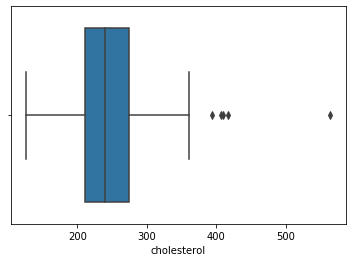

In [24]:
#Distribution of cholesterol
sns.boxplot(df['cholesterol'])
plt.show()

Cholesteral has one data point (564) that is significantly above the maximum on the boxplot (Q3 + 1.5 * IQR). Since cholesterol readings above 240 mg/dL are considered "very high" and many standard cholesterol tests have scales that stop at 350 mg/dL, we can be fairly confident that the high data point of 564 is an error.

In [25]:
#Remove outlier
indexNames = df[df['cholesterol'] == 564 ].index
df.drop(indexNames, inplace=True)
df.shape

(301, 14)

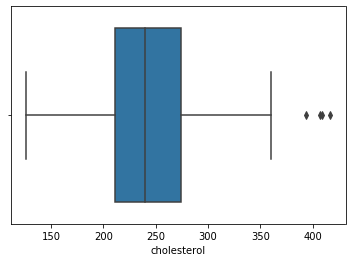

In [26]:
#New cholesterol boxplot
sns.boxplot(df['cholesterol'])
plt.show()

There are still a few high data points around 400 mg/dL, but since there are multiple values in that range after removing duplicates from the data, we will keep them in the dataset.

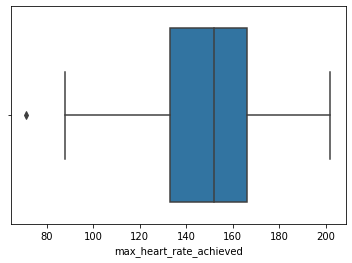

In [27]:
#Distribution of max heart rate achieved
sns.boxplot(df['max_heart_rate_achieved'])
plt.show()

Max heart rate achieved has one low outlier with a max heart rate of 71. Target maximum heart rates are calculated by subtracting your age from 220, so you would have to be 149 years old to have a target maximum heart rate of 71 bpm. Let's assume that this was an error and drop the outlier from the dataset.

In [28]:
#Remove outlier
indexNames = df[df['max_heart_rate_achieved'] == 71].index
df.drop(indexNames, inplace=True)
df.shape

(300, 14)

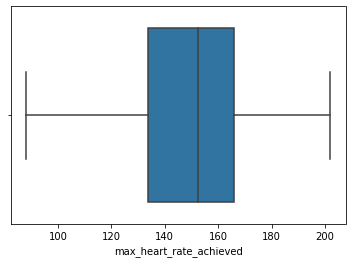

In [29]:
#New boxplot for max heart rate achieved
sns.boxplot(df['max_heart_rate_achieved'])
plt.show()

## Relationship of features to target

Relationship between sex and heart disease

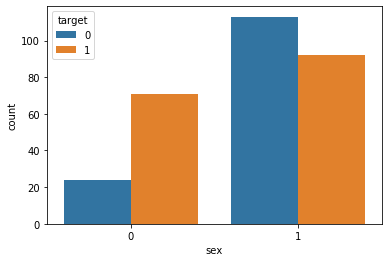

In [30]:
#Sex vs. Target
#Sex (0 = female; 1 = male)
#Target (0 = has heart disease; 1 = no heart disease)
sns.countplot(x="sex", hue="target", data=df)

In this dataset, males are disproportionately likely to have heart disease.

In [31]:
df.groupby('target')['sex'].value_counts()

target  sex
0       1      113
        0       24
1       1       92
        0       71
Name: sex, dtype: int64

Of the 137 subjects in the dataset with heart disease, 92 (67.2%) are male.

Relationship between exercise-induced angina and heart disease

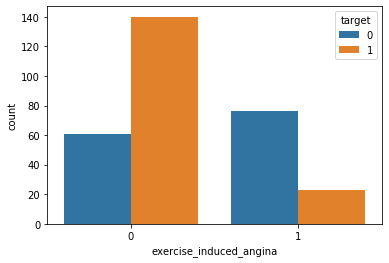

In [32]:
#Exercise-Induced Angina vs. Target
#Exang (0 = no; 1 = yes)
#Target (0 = has heart disease; 1 = no heart disease)
sns.countplot(x="exercise_induced_angina", hue="target", data=df)

Subjects with exercise-induced angina (chest pain during exercise) are disproportionately likely to have heart disease. 

In [33]:
df.groupby('target')['exercise_induced_angina'].value_counts()

target  exercise_induced_angina
0       1                           76
        0                           61
1       0                          140
        1                           23
Name: exercise_induced_angina, dtype: int64

Of the 137 subjects with heart disease, 76 (55.5%) had exercise-induced angina compared to 14.1% of subjects without heart disease.

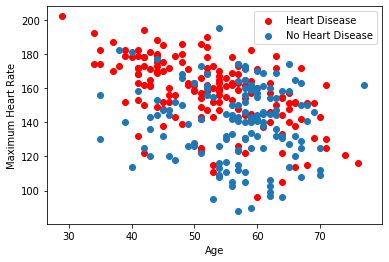

In [45]:
plt.scatter(x=df.age[df.target==1], y=df.max_heart_rate_achieved[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.max_heart_rate_achieved[(df.target==0)])
plt.legend(["Heart Disease", "No Heart Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [ ]:
['age', 'sex', 'chest_pain_type', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

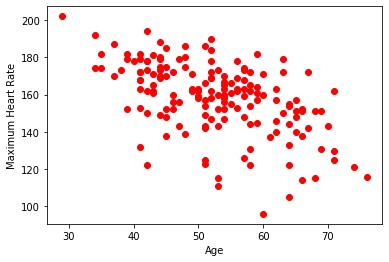

In [47]:
plt.scatter(x=df.age[df.target==1], y=df.max_heart_rate_achieved[(df.target==1)], c="red")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

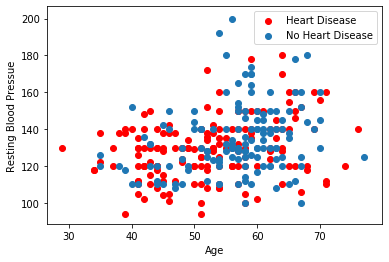

In [49]:
plt.scatter(x=df.age[df.target==1], y=df.resting_blood_pressure[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.resting_blood_pressure[(df.target==0)])
plt.legend(["Heart Disease", "No Heart Disease"])
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressue")
plt.show()

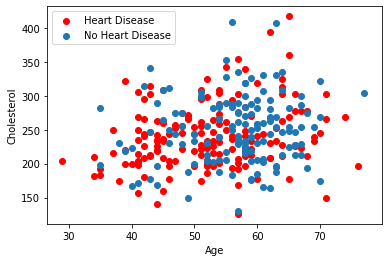

In [50]:
plt.scatter(x=df.age[df.target==1], y=df.cholesterol[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.cholesterol[(df.target==0)])
plt.legend(["Heart Disease", "No Heart Disease"])
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()

## Feature Engineering 

We will use one-hot encoding to create dummy variables for categorical variables like sex and fasting blood sugar.

In [34]:
#Create dummy variables for categorical variables
df = pd.get_dummies(df, drop_first=True)
df.head(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Since the numerical variables have very different ranges, we'll need to normalize them before building our model.

In [40]:
#Normalize numerical variables to fall in a scale from 0 to 1
saved_columns = df.columns
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True)
scaler.fit(df)
normData = pd.DataFrame(scaler.transform(df), index=df.index, columns=saved_columns)

In [42]:
normData.head(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,0.708333,1.0,1.000000,0.481132,0.367698,1.0,0.0,0.543860,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.426117,0.0,0.5,0.868421,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.268041,0.0,0.0,0.736842,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.378007,0.0,0.5,0.789474,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.783505,0.0,0.5,0.657895,1.0,0.096774,1.0,0.0,0.666667,1.0
5,0.583333,1.0,0.000000,0.433962,0.226804,0.0,0.5,0.526316,0.0,0.064516,0.5,0.0,0.333333,1.0
6,0.562500,0.0,0.333333,0.433962,0.577320,0.0,0.0,0.570175,0.0,0.209677,0.5,0.0,0.666667,1.0
7,0.312500,1.0,0.333333,0.245283,0.470790,0.0,0.5,0.745614,0.0,0.000000,1.0,0.0,1.000000,1.0
8,0.479167,1.0,0.666667,0.735849,0.250859,1.0,0.5,0.649123,0.0,0.080645,1.0,0.0,1.000000,1.0
9,0.583333,1.0,0.666667,0.528302,0.144330,0.0,0.5,0.754386,0.0,0.258065,1.0,0.0,0.666667,1.0
